# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

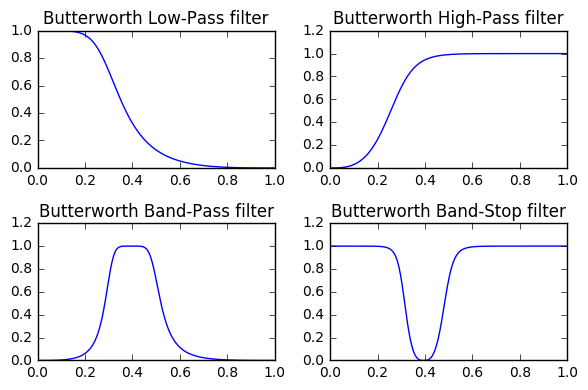

In [2]:
cut_off = 0.3
filter_order = 3

## Butterworth Pass-filter
Bdenom_low,Bnume_low = signal.butter(filter_order, cut_off)

Bw_low, Bh_low = signal.freqz(Bdenom_low, Bnume_low)

#plt.plot(w, 20 * np.log10(abs(h))) #Use this to plot an analog signal
plt.subplot(2,2,1)
plt.plot(Bw_low/np.pi, abs(Bh_low)) #Use this to plot an analog signal
plt.title('Butterworth Low-Pass filter')



## Butterworth High-Pass filter
Bdenom_high, Bnume_high = signal.butter(filter_order, cut_off, 'high')

Bw_high, Bh_high = signal.freqz(Bdenom_high, Bnume_high)


plt.subplot(2,2,2)
plt.plot(Bw_high/np.pi, abs(Bh_high))
plt.title('Butterworth High-Pass filter')


## Butterworth Band-Pass filter

Bdenom_band, Bnume_band = signal.butter(filter_order, [0.3, 0.5], 'bandpass')

Bw_band, Bh_band = signal.freqz(Bdenom_band, Bnume_band)

plt.subplot(2,2,3)
plt.plot(Bw_band/np.pi, abs(Bh_band))
plt.title('Butterworth Band-Pass filter')

## Butterworth Band-Stop filter

Bdenom_bandS, Bnume_bandS = signal.butter(filter_order, [0.3, 0.5], 'bandstop')

Bw_bandS, Bh_bandS = signal.freqz(Bdenom_bandS, Bnume_bandS)

plt.subplot(2,2,4)
plt.plot(Bw_bandS/np.pi, abs(Bh_bandS))
plt.title('Butterworth Band-Stop filter')
plt.tight_layout()

#plt.plot (a,b)

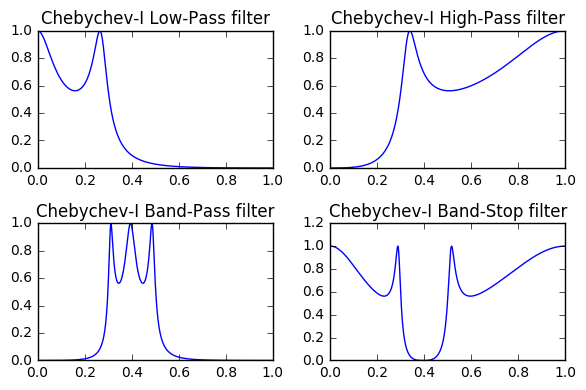

In [3]:
## Butterworth Pass-filter
Cdenom_low,Cnume_low = signal.cheby1(filter_order, 5, cut_off)

Cw_low, Ch_low = signal.freqz(Cdenom_low, Cnume_low)

#plt.plot(w, 20 * np.log10(abs(h))) #Use this to plot an analog signal
plt.subplot(2,2,1)
plt.plot(Cw_low/np.pi, abs(Ch_low)) #Use this to plot an analog signal
plt.title('Chebychev-I Low-Pass filter')

## Butterworth Pass-filter
Cdenom_high,Cnume_high = signal.cheby1(filter_order, 5, cut_off, 'high')

Cw_high, Ch_high = signal.freqz(Cdenom_high, Cnume_high)

#plt.plot(w, 20 * np.log10(abs(h))) #Use this to plot an analog signal
plt.subplot(2,2,2)
plt.plot(Cw_high/np.pi, abs(Ch_high)) #Use this to plot an analog signal
plt.title('Chebychev-I High-Pass filter')

## Chebychev-I Band-Pass filter

Cdenom_band, Cnume_band = signal.cheby1(filter_order, 5, [0.3, 0.5], 'bandpass')

Cw_band, Ch_band = signal.freqz(Cdenom_band, Cnume_band)

plt.subplot(2,2,3)
plt.plot(Cw_band/np.pi, abs(Ch_band))
plt.title('Chebychev-I Band-Pass filter')

## Chebychev-I Band-Stop filter

Cdenom_bandS, Cnume_bandS = signal.cheby1(filter_order, 5, [0.3, 0.5], 'bandstop')

Cw_bandS, Ch_bandS = signal.freqz(Cdenom_bandS, Cnume_bandS)

plt.subplot(2,2,4)
plt.plot(Cw_bandS/np.pi, abs(Ch_bandS))
plt.title('Chebychev-I Band-Stop filter')
plt.tight_layout()

**1.2**

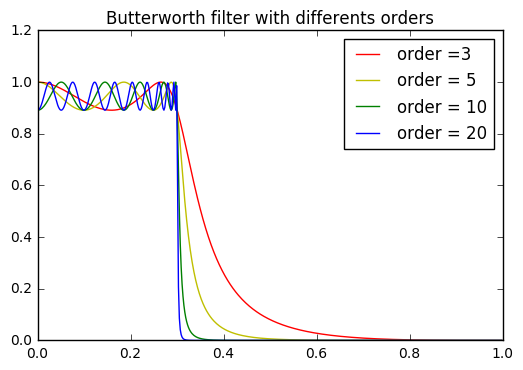

In [4]:
filter_order = [3,5,10,20]
c = ['r','y','g','b']

i=0
for i in range (0, len(filter_order)):
    Cdenom_low,Cnume_low = signal.cheby1(filter_order[i], 1, cut_off)

    Cw_low, Ch_low = signal.freqz(Cdenom_low, Cnume_low)
    
    plt.plot(Cw_low/np.pi, abs(Ch_low),c[i])
    
plt.legend(['order =3', 'order = 5', 'order = 10', 'order = 20'])
plt.title('Butterworth filter with differents orders')

In [5]:
#As we can see, as high is the order of the filter more stretch it became the cuf-off.
#The chose of the order of the filter will depends on the applications and specifications
#that we want the filter does.

## Recursive filter 

**2.1**

In [6]:
#DECLARATION OF FUNCTIONS

def Dirac (n=20,N=41):
    if n <0 or n > N-1:
        raise  ValueError('n should be in in range [0,N-1]')
        return
    d =np.zeros((N,))
    d[n] = 1
    
    return d


<Container object of 3 artists>

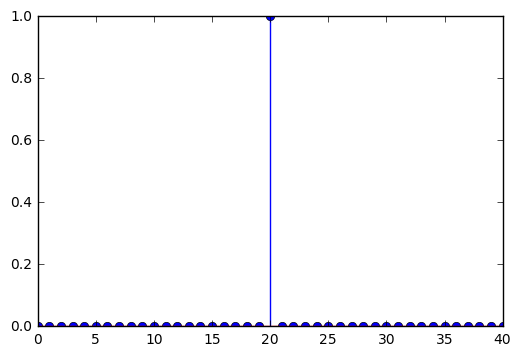

In [7]:
#Building a Dirac response
D=Dirac(20,41)

plt.stem(D)


**2.2**

In [8]:
def smoothing(x,s=0.5,Ts=1):
 
    #Defining values to use for sampling
    s = s/Ts
    alpha = s*Ts
    a = np.exp(-alpha)
    y_causal = np.zeros(x.shape)
    
    for k in range (2,x.size):
        y_causal[k] = x[k] + a*(alpha-1)*x[k-1] +2*a*y_causal[k-1] - a*a*y_causal[k-2]
        
    y_anticausal = np.zeros(x.shape)  
    for k in range (x.size-3,-1,-1):
        y_anticausal[k] = a*(alpha+1)*x[k+1] -a*a*x[k+2] + 2*a*y_anticausal[k+1] - a*a*y_anticausal[k+2]
        
    y = y_causal + y_anticausal
    
    return y



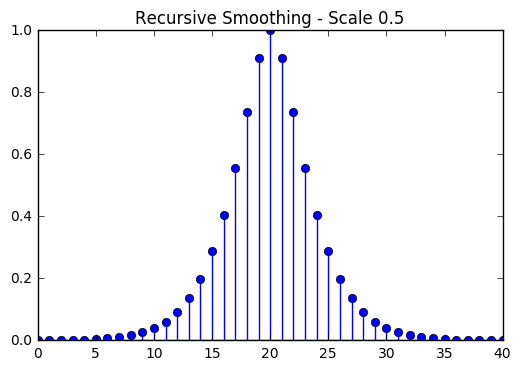

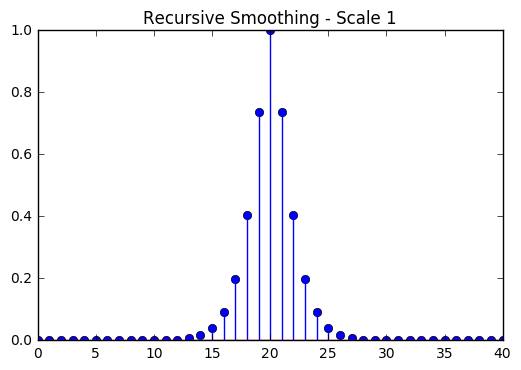

In [9]:
plt.figure()
plt.stem(smoothing(D,s=0.5,Ts=1))
plt.title('Recursive Smoothing - Scale 0.5')

plt.figure()
plt.stem(smoothing(D,s=1,Ts=1))
plt.title('Recursive Smoothing - Scale 1')

**2.3**

In [10]:

def Box (n=0,N=10):
    if n <0 or n > N-1:
        raise  ValueError('n should be in in range [0,N-1]')
        return
    B =np.zeros((N,))
    B[n:] = np.ones((N-n,))
    
    return B

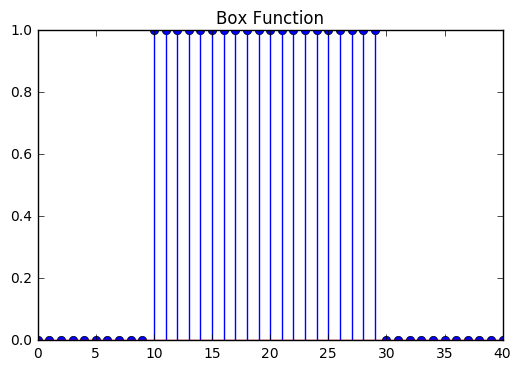

In [11]:
box = Box(10,41) - Box(30,41)

plt.stem(box)
plt.title ('Box Function')

**2.4**

In [12]:
def derivative(x,s,Ts):
    s = s/Ts
    alpha = s*Ts
    a = np.exp(-alpha)
    
    y_causal = np.zeros(x.shape)
    
    for k in range (2,x.size):
        y_causal[k] = -s*a*alpha*x[k-1]+2*a*y_causal[k-1]-a*a*y_causal[k-2]
        
    y_anticausal = np.zeros(x.shape)
   
    for k in range (x.size-3,-1,-1):
        y_anticausal[k] = s*a*alpha*x[k+1]+2*a*y_anticausal[k+1]-a*a*y_anticausal[k+2]
        
    y = y_causal + y_anticausal
    
    return y



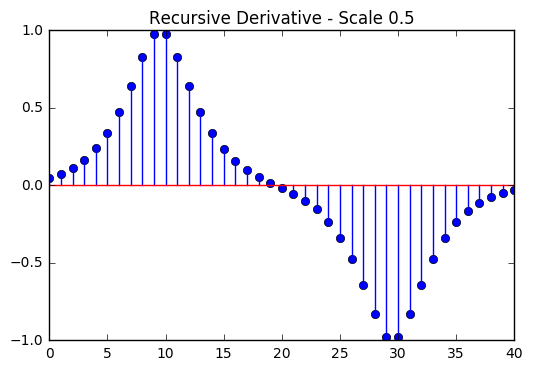

In [13]:
plt.stem(derivative(box,s=0.5,Ts=1))
plt.title('Recursive Derivative - Scale 0.5')

**3.1**

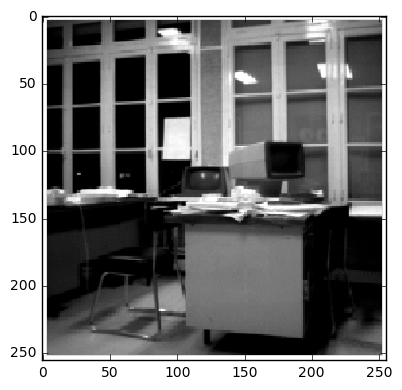

In [25]:
im = img_as_float(io.imread('../images/bureau.gif',as_grey=True))
io.imshow(im)





**3.2** , **3.3**

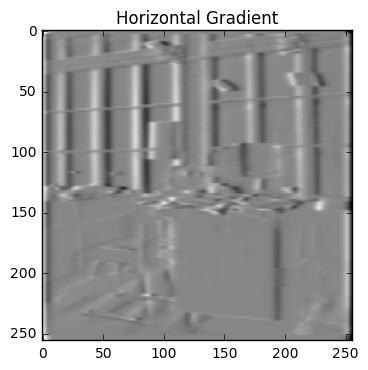

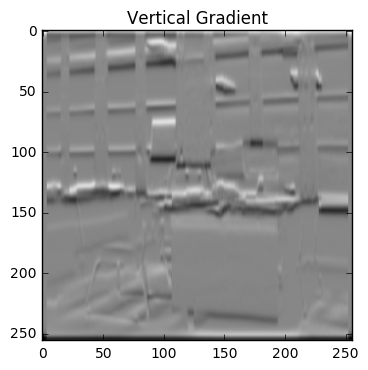

In [27]:

im_row_smooth = np.zeros(im.shape)
for row in range(im.shape[0]):
    im_row_smooth[row,:] = smoothing(im[row,:], 1, 1)
    
hor_grad = np.zeros(im.shape)

for row in range(im.shape[0]):
    hor_grad[row,:] = derivative(im_row_smooth[row,:], 1, 1)
    
im_col_smooth = np.zeros(im.shape)
for col in range(im.shape[0]):
    im_col_smooth[:,col] = smoothing(im[:,col], 1, 1)  
    
vert_grad = np.zeros(im.shape)

for col in range(im.shape[0]):
    vert_grad[:,col] = derivative(im_col_smooth[:,col], 1, 1)    
    
plt.figure()
plt.imshow(hor_grad, cmap = 'gray')
plt.title('Horizontal Gradient')

plt.figure()
plt.imshow(vert_grad, cmap = 'gray')
plt.title('Vertical Gradient')

**3.4**